In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import random
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences

from keras.models import Model

from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical

from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape

from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import scipy.io.wavfile
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import matplotlib.patheffects as pe
from sklearn.manifold import TSNE 
import seaborn as sb
#from deep_emotion_recognition import DeepEmotionRecognizer

In [2]:

#tessfile=os.listdir('E:/Audio_Data/TESS/')
#tessfile# for angry [-9:-4], Disgust [-11:-4],fear[-8:-4],happy[-9:-4],neutral[-11:-4],ps[-6:-4] set as suprise
#feels=[]
#for item in tessfile:
    #if item[-11:-4]=='neutral':
        #feels.append('neutral')
    #elif item[-9:-4]=='happy':
        #feels.append('happy')
    #elif item[-7:-4]=='sad' :
        #feels.append('sad')
    #elif item[-9:-4]=='angry':
        #feels.append('angry')
    #elif item[-11:-4]=='disgust':
        #feels.append('disgust')
    #elif item[-8:-4]=='fear':
        #feels.append('fear')
    #elif item[-6:-4]=='ps':
        #feels.append('surprised')
#print(feels)

In [3]:
files=os.listdir('E:/Audio_full/')

In [4]:
#ipd.Audio('E:/Audio_full/')
#print(files)

In [5]:
data, sampling_rate = librosa.load('E:/Audio_full/03-01-01-01-01-01-01.wav')
#print("03-01-03-02-01-01-01.wav"[6:-16]) #checks the thrid value
#print("DCa06"[2:4])

<Figure size 864x288 with 0 Axes>

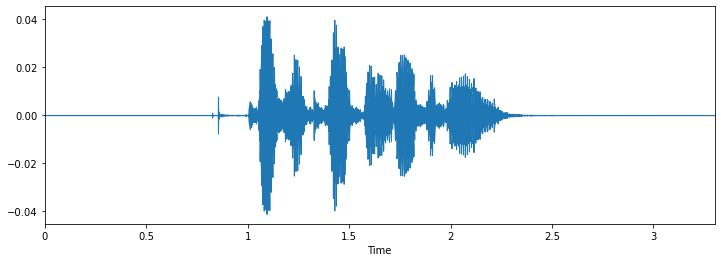

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

<ipython-input-7-bedd959df1a1>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('E:/Audio_full/03-01-01-01-01-01-01.wav')
<ipython-input-7-bedd959df1a1>:1: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  sr,x = scipy.io.wavfile.read('E:/Audio_full/03-01-01-01-01-01-01.wav')
<ipython-input-7-bedd959df1a1>:18: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


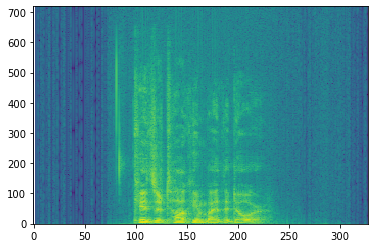

In [7]:
sr,x = scipy.io.wavfile.read('E:/Audio_full/03-01-01-01-01-01-01.wav')
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

03-02-04-01-02-02-17.wav


<Figure size 864x288 with 0 Axes>

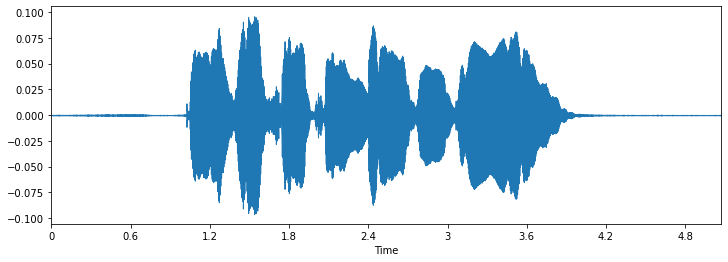

In [8]:
train=os.scandir('E:/Audio_full')
i = random.choice(os.listdir('E:/Audio_full'))
print(i)
audio_name = i
path = os.path.join('E:/Audio_full/',i)

x, sr = librosa.load('E:/Audio_full/' + i)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [9]:
feeling_list=[]
for item in files:
    if item[6:-16]=='01' or item[2]=='n' or item[-11:-4]=='neutral' or item[6:-16]=='02':
        feeling_list.append('neutral')
    #elif item[6:-16]=='02':
        #feeling_list.append('calm')
    elif item[6:-16]=='03' or item[2]=='h' or item[-9:-4]=='happy':
        feeling_list.append('happy')
    elif item[6:-16]=='04' or item[2:4]=='sa' or item[-7:-4]=='sad':
        feeling_list.append('sad')
    elif item[6:-16]=='05' or item[2]=='a' or item[-9:-4]=='angry':
        feeling_list.append('angry')
    elif item[6:-16]=='07' or item[2]=='d' or item[-11:-4]=='disgust':
        feeling_list.append('disgust')
    elif item[6:-16]=='06' or item[2]=='f'or item[-8:-4]=='fear':
        feeling_list.append('fear')
    elif item[6:-16]=='08' or item[2:4]=='su' or item[-6:-4]=='ps':
        feeling_list.append('surprised')

In [10]:
labels = pd.DataFrame(feeling_list,columns=['emotions'])
labels

,emotions
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
5639,fear
5640,happy
5641,neutral
5642,surprised


In [11]:
#i=1
#for item in files:
    #if item[6:-16]=='01' or item[2]=='n':
        #feeling='neutral'
    #elif item[6:-16]=='02':
        #feeling='calm'
    #elif item[6:-16]=='03' or item[2]=='h':
        #feeling='happy'
    #elif item[6:-16]=='04' or item[2:4]=='sa':
        #feeling='sad'
    #elif item[6:-16]=='05' or item[2]=='a':
        #feeling='angry'
    #elif item[6:-16]=='06' or item[2]=='f':
        #feeling='fear'
    #elif item[6:-16]=='07' or item[2]=='d':
        #feeling='disgust'
    #elif item[6:-16]=='08' or item[2:4]=='su':
        #feeling='surprised'
    #print(i,item,feeling) 
    #i+=1

In [12]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(files):
    X, sample_rate = librosa.load('E:/Audio_full/'+y, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate, n_mfcc=50).T,axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [13]:
df

,feature
0,"[-700.3989, 58.63021, -3.025852, 16.040241, 4...."
1,"[-653.169, 58.028076, -12.581207, 11.818786, -..."
2,"[-617.0523, 60.10337, -5.9842577, 13.886285, 1..."
3,"[-698.7211, 47.088486, -11.333614, 12.963088, ..."
4,"[-715.9226, 71.9768, 4.457525, 18.602499, 8.40..."
...,...
5639,"[-343.40387, 32.59755, -9.197987, 25.315773, 0..."
5640,"[-345.47714, 24.427338, -14.398651, 36.95299, ..."
5641,"[-416.72632, 71.14924, -1.1160216, 42.52479, -..."
5642,"[-374.82407, 46.681873, -12.381617, 18.139084,..."


In [14]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df3=df3.fillna(0)

In [15]:
newdf = pd.concat([df3,labels], axis=1)
newdf = newdf.rename(index=str, columns={"emotions": "label"})

In [16]:
emotions=np.unique(labels)
emotions

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'],
      dtype=object)

In [17]:
newdf.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49, 'label'],
      dtype='object')

In [18]:
newdf.to_csv(r'E:\dataFrame.csv',index=True,header=True)

In [19]:
newdf=shuffle(newdf)
newdf

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
3070,-454.241180,43.722687,2.651291,13.150071,1.753029,8.954980,-15.229219,5.904014,-17.079830,8.254810,...,-1.160228,3.154563,2.768323,4.565574,5.141566,5.639520,8.104722,5.772964,3.308032,fear
5047,-346.042847,64.269371,-27.136082,6.411130,-22.524084,6.199802,-15.610813,-13.406859,-16.586313,9.155910,...,1.518973,0.093043,0.698278,-0.576551,-0.280882,-0.054800,1.063897,-0.605778,-0.486035,surprised
4574,-414.572937,79.522644,-13.604004,12.717081,-17.956177,18.111280,-12.636063,-23.085434,-7.703765,5.233702,...,4.061509,4.997318,4.420675,4.550211,2.938672,0.325783,2.168780,0.060504,-0.113285,disgust
1389,-530.887634,45.313034,-22.260742,2.479893,-9.179730,-5.311126,-16.526203,-7.041816,-17.116438,4.637795,...,2.306821,2.009969,0.387900,-0.684539,-0.437857,-0.308356,1.020017,-0.304136,-1.402145,surprised
1943,-589.241089,34.857567,-22.982307,-3.297718,-26.734301,-12.630058,-15.327345,-14.128591,-14.756752,-4.313458,...,1.935209,-1.224902,-0.223622,-1.094533,-1.942733,-0.138878,0.475138,-1.360025,-1.422330,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-852.922302,38.462666,-4.903394,15.354951,-10.045864,1.837709,-11.566463,-5.436925,-11.266252,1.337674,...,2.249326,1.128667,-0.137043,-2.378776,-1.253468,0.627441,0.756325,-0.444524,-1.421927,neutral
2247,-514.690308,37.906471,-21.251598,3.485544,-7.445414,-10.221087,-12.995898,-10.869744,-18.738615,5.361226,...,-2.325656,-1.445475,-1.376799,-2.904936,-3.282340,0.568009,-1.056085,-3.787086,-3.674065,fear
4182,-481.179321,85.664658,15.904797,7.041965,9.641997,14.967473,-17.205130,2.986224,-23.399818,0.967542,...,6.544503,10.016861,12.096431,11.697247,11.783421,8.053484,5.728806,4.755653,2.037522,disgust
1118,-597.731812,82.627632,-11.839944,16.045254,10.232141,6.043048,-10.295626,-7.999308,-6.366780,9.783209,...,1.034151,0.413581,-0.977911,-0.691413,-0.204169,1.445356,1.221177,-0.416135,0.722375,disgust


In [20]:
y =newdf['label']
x=newdf.iloc[:,:-1]
x.shape,y.shape

((5644, 50), (5644,))

In [21]:
x

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
3070,-454.241180,43.722687,2.651291,13.150071,1.753029,8.954980,-15.229219,5.904014,-17.079830,8.254810,...,1.763260,-1.160228,3.154563,2.768323,4.565574,5.141566,5.639520,8.104722,5.772964,3.308032
5047,-346.042847,64.269371,-27.136082,6.411130,-22.524084,6.199802,-15.610813,-13.406859,-16.586313,9.155910,...,1.845343,1.518973,0.093043,0.698278,-0.576551,-0.280882,-0.054800,1.063897,-0.605778,-0.486035
4574,-414.572937,79.522644,-13.604004,12.717081,-17.956177,18.111280,-12.636063,-23.085434,-7.703765,5.233702,...,2.989498,4.061509,4.997318,4.420675,4.550211,2.938672,0.325783,2.168780,0.060504,-0.113285
1389,-530.887634,45.313034,-22.260742,2.479893,-9.179730,-5.311126,-16.526203,-7.041816,-17.116438,4.637795,...,0.085151,2.306821,2.009969,0.387900,-0.684539,-0.437857,-0.308356,1.020017,-0.304136,-1.402145
1943,-589.241089,34.857567,-22.982307,-3.297718,-26.734301,-12.630058,-15.327345,-14.128591,-14.756752,-4.313458,...,6.275384,1.935209,-1.224902,-0.223622,-1.094533,-1.942733,-0.138878,0.475138,-1.360025,-1.422330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-852.922302,38.462666,-4.903394,15.354951,-10.045864,1.837709,-11.566463,-5.436925,-11.266252,1.337674,...,1.540289,2.249326,1.128667,-0.137043,-2.378776,-1.253468,0.627441,0.756325,-0.444524,-1.421927
2247,-514.690308,37.906471,-21.251598,3.485544,-7.445414,-10.221087,-12.995898,-10.869744,-18.738615,5.361226,...,3.775643,-2.325656,-1.445475,-1.376799,-2.904936,-3.282340,0.568009,-1.056085,-3.787086,-3.674065
4182,-481.179321,85.664658,15.904797,7.041965,9.641997,14.967473,-17.205130,2.986224,-23.399818,0.967542,...,5.376147,6.544503,10.016861,12.096431,11.697247,11.783421,8.053484,5.728806,4.755653,2.037522
1118,-597.731812,82.627632,-11.839944,16.045254,10.232141,6.043048,-10.295626,-7.999308,-6.366780,9.783209,...,1.538416,1.034151,0.413581,-0.977911,-0.691413,-0.204169,1.445356,1.221177,-0.416135,0.722375


In [22]:
y

3070         fear
5047    surprised
4574      disgust
1389    surprised
1943          sad
          ...    
283       neutral
2247         fear
4182      disgust
1118      disgust
4011    surprised
Name: label, Length: 5644, dtype: object

In [23]:
x.shape,y.shape

((5644, 50), (5644,))

In [24]:
#Training and Testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [25]:
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred=svclassifier.predict(X_test)

SVC(kernel='linear')

In [26]:
y_test
print(y_pred)

174       neutral
4374      neutral
3896         fear
1195      disgust
764         angry
          ...    
4709        happy
5346        happy
2761         fear
1309    surprised
4991    surprised
Name: label, Length: 1129, dtype: object

['neutral' 'neutral' 'fear' ... 'sad' 'surprised' 'surprised']


              precision    recall  f1-score   support

       angry       0.63      0.75      0.68       155
     disgust       0.67      0.71      0.69       123
        fear       0.72      0.66      0.69       172
       happy       0.65      0.63      0.64       155
     neutral       0.78      0.87      0.82       208
         sad       0.74      0.68      0.71       156
   surprised       0.77      0.65      0.71       160

    accuracy                           0.71      1129
   macro avg       0.71      0.71      0.71      1129
weighted avg       0.71      0.71      0.71      1129

----accuracy score 71.2134632418069 ----


<AxesSubplot:>

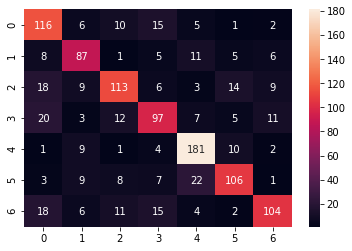

In [27]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [28]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 75.45957918050942 ----
----test accuracy score 71.2134632418069 ----


In [29]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [30]:
model.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [31]:
y_pred=model.predict(X_test)
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 80.96%


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.89      0.86      0.88       155
     disgust       1.00      0.67      0.81       123
        fear       0.87      0.75      0.80       172
       happy       0.89      0.81      0.85       155
     neutral       0.86      0.82      0.84       208
         sad       0.62      0.79      0.70       156
   surprised       0.72      0.93      0.81       160

    accuracy                           0.81      1129
   macro avg       0.83      0.81      0.81      1129
weighted avg       0.83      0.81      0.81      1129



In [33]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [34]:
x_traincnn.shape, x_testcnn.shape,X_train.shape

((4515, 50, 1), (1129, 50, 1), (4515, 50))

In [35]:
y_train.size,y_test.size

(4515, 1129)

In [36]:
#cnn
model = Sequential()

model.add(Conv1D(64, 5,padding='same',input_shape=(50,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)



In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 50, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 128)           0

In [38]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [39]:
y_traincnn=[]
for lab in y_train:
    if lab=='neutral':
        y_traincnn.append(1)
    elif lab=='happy':
        y_traincnn.append(2)
    elif lab=='sad':
        y_traincnn.append(3)
    elif lab=='angry':
        y_traincnn.append(4)
    elif lab=='fear':
        y_traincnn.append(5)
    elif lab=='disgust':
        y_traincnn.append(6)
    elif lab=='surprised':
        y_traincnn.append(7)
y_traincnn=np.asarray(y_traincnn)
y_testcnn=[]
for lab in y_test:
    if lab=='neutral':
        y_testcnn.append(1)
    elif lab=='happy':
        y_testcnn.append(2)
    elif lab=='sad':
        y_testcnn.append(3)
    elif lab=='angry':
        y_testcnn.append(4)
    elif lab=='fear':
        y_testcnn.append(5)
    elif lab=='disgust':
        y_testcnn.append(6)
    elif lab=='surprised':
        y_testcnn.append(7)
y_testcnn=np.asarray(y_testcnn)

In [40]:
y_traincnn.size,y_testcnn.size

(4515, 1129)

In [41]:
cnnhistory=model.fit(x_traincnn, y_traincnn, batch_size=16, epochs=200, validation_data=(x_testcnn, y_testcnn))

Epoch 1/200
283/283 [==============================] - 3s 7ms/step - loss: 5.3896 - accuracy: 0.1828 - val_loss: 1.6868 - val_accuracy: 0.3419
Epoch 2/200
283/283 [==============================] - 1s 4ms/step - loss: 2.5790 - accuracy: 0.3151 - val_loss: 1.4459 - val_accuracy: 0.4783
Epoch 3/200
283/283 [==============================] - 1s 4ms/step - loss: 1.8920 - accuracy: 0.4008 - val_loss: 1.3241 - val_accuracy: 0.5208
Epoch 4/200
283/283 [==============================] - 1s 4ms/step - loss: 1.5288 - accuracy: 0.4792 - val_loss: 1.1766 - val_accuracy: 0.5988
Epoch 5/200
283/283 [==============================] - 1s 4ms/step - loss: 1.4274 - accuracy: 0.5078 - val_loss: 1.0763 - val_accuracy: 0.6368
Epoch 6/200
283/283 [==============================] - 1s 4ms/step - loss: 1.2675 - accuracy: 0.5674 - val_loss: 1.0167 - val_accuracy: 0.6510
Epoch 7/200
283/283 [==============================] - 1s 4ms/step - loss: 1.1983 - accuracy: 0.5762 - val_loss: 1.0244 - val_accuracy: 0.6422

Epoch 58/200
283/283 [==============================] - 1s 4ms/step - loss: 0.5166 - accuracy: 0.8040 - val_loss: 0.5942 - val_accuracy: 0.7617
Epoch 59/200
283/283 [==============================] - 1s 4ms/step - loss: 0.5474 - accuracy: 0.7997 - val_loss: 0.5414 - val_accuracy: 0.8087
Epoch 60/200
283/283 [==============================] - 1s 5ms/step - loss: 0.5189 - accuracy: 0.8089 - val_loss: 0.5469 - val_accuracy: 0.7945
Epoch 61/200
283/283 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.8132 - val_loss: 0.5450 - val_accuracy: 0.7910
Epoch 62/200
283/283 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.8094 - val_loss: 0.5419 - val_accuracy: 0.7945
Epoch 63/200
283/283 [==============================] - 1s 4ms/step - loss: 0.5162 - accuracy: 0.8023 - val_loss: 0.5400 - val_accuracy: 0.8043
Epoch 64/200
283/283 [==============================] - 1s 4ms/step - loss: 0.5117 - accuracy: 0.8176 - val_loss: 0.5389 - val_accuracy:

Epoch 115/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3313 - accuracy: 0.8748 - val_loss: 0.4802 - val_accuracy: 0.8202
Epoch 116/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3484 - accuracy: 0.8707 - val_loss: 0.4565 - val_accuracy: 0.8237
Epoch 117/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8667 - val_loss: 0.4565 - val_accuracy: 0.8273
Epoch 118/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3336 - accuracy: 0.8760 - val_loss: 0.4547 - val_accuracy: 0.8353
Epoch 119/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3410 - accuracy: 0.8716 - val_loss: 0.4595 - val_accuracy: 0.8370
Epoch 120/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3286 - accuracy: 0.8752 - val_loss: 0.4637 - val_accuracy: 0.8326
Epoch 121/200
283/283 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8765 - val_loss: 0.4567 - val_ac

283/283 [==============================] - 1s 4ms/step - loss: 0.2371 - accuracy: 0.9190 - val_loss: 0.4304 - val_accuracy: 0.8468
Epoch 172/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2371 - accuracy: 0.9140 - val_loss: 0.4375 - val_accuracy: 0.8406
Epoch 173/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2413 - accuracy: 0.9149 - val_loss: 0.4440 - val_accuracy: 0.8441
Epoch 174/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2263 - accuracy: 0.9178 - val_loss: 0.4527 - val_accuracy: 0.8361
Epoch 175/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2289 - accuracy: 0.9157 - val_loss: 0.4560 - val_accuracy: 0.8432
Epoch 176/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2136 - accuracy: 0.9236 - val_loss: 0.4613 - val_accuracy: 0.8344
Epoch 177/200
283/283 [==============================] - 1s 4ms/step - loss: 0.2361 - accuracy: 0.9144 - val_loss: 0.4330 - val_accuracy: 0.8547

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

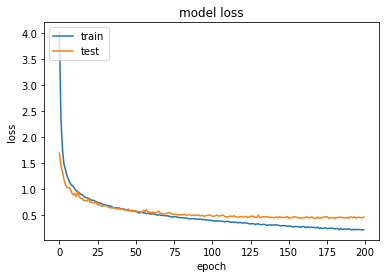

In [42]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

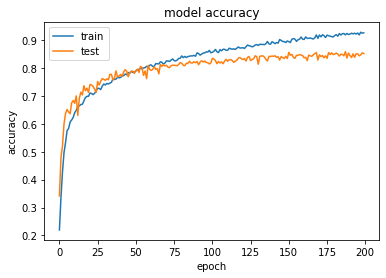

In [43]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
predictions = model.predict_classes(x_testcnn)

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
predictions

array([1, 1, 5, ..., 7, 7, 7], dtype=int64)

In [46]:
y_testcnn

array([1, 1, 5, ..., 5, 7, 7])

In [47]:
new_Ytest = y_testcnn.astype(int)

In [48]:
new_Ytest

array([1, 1, 5, ..., 5, 7, 7])

In [49]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90       208
           2       0.84      0.84      0.84       155
           3       0.82      0.80      0.81       156
           4       0.93      0.88      0.90       155
           5       0.77      0.81      0.79       172
           6       0.80      0.93      0.86       123
           7       0.89      0.82      0.85       160

    accuracy                           0.85      1129
   macro avg       0.85      0.85      0.85      1129
weighted avg       0.85      0.85      0.85      1129



In [50]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 1 = neutral, 2 = happy, 3 = sad, 4 = angry, 5 = fear, 6 = digust, 7 = surprised,

[[184   6   9   0   4   5   0]
 [  2 130   3   2  10   2   6]
 [  8   2 125   1  14   4   2]
 [  2   4   0 136   3   8   2]
 [  2   4  11   4 140   5   6]
 [  1   1   2   2   2 114   1]
 [  2   8   2   2  10   4 132]]


In [51]:
model.save('E:/testing10_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [52]:
new_model=keras.models.load_model('E:/testing10_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 50, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 128)           0

In [53]:
loss, acc = new_model.evaluate(x_testcnn, y_testcnn)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8512
Restored model, accuracy: 85.12%
